In [193]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

# for number-crunching
import numpy as np

import copy
import random

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [194]:
# import the data
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url,sep=';')

In [195]:
data.shape

(1599, 12)

In [196]:
Listing = []
Original_Values = []
for values in range(10):
  Listing.append(random.randint(1,1599))

In [197]:
# for index in Listing:
#   Original_Values.append(data.loc[index,'residual sugar'])a

In [198]:
data1 = copy.deepcopy(data)
data = data.drop(Listing,axis=0)
Missing_Values = copy.deepcopy(data1.iloc[Listing,:])
Original_Values = Missing_Values['residual sugar']
Missing_Values = Missing_Values.drop('residual sugar',axis=1)

In [199]:
Missing_Values

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
754,7.8,0.480,0.68,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
643,9.5,0.590,0.44,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5
772,9.5,0.570,0.27,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5
13,7.8,0.610,0.29,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
1495,7.0,0.430,0.02,0.080,15.0,28.0,0.99492,3.35,0.81,10.6,6
1059,8.9,0.480,0.53,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
51,6.6,0.520,0.04,0.069,8.0,15.0,0.99560,3.40,0.63,9.4,6
1108,8.1,0.780,0.10,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5
63,7.0,0.735,0.05,0.081,13.0,54.0,0.99660,3.39,0.57,9.8,5
880,9.2,0.560,0.18,0.078,10.0,21.0,0.99576,3.15,0.49,9.9,5


In [200]:
Values = data['residual sugar']
Values = Values[:,None]
Features = data.drop('residual sugar',axis=1)
scaler = StandardScaler()

scaler.fit(Features)
Features = scaler.transform(Features)
Missing_Values = scaler.transform(Missing_Values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [201]:
Features = torch.Tensor(Features).float()
Values = torch.Tensor(Values).float()

Missing_Values = torch.Tensor(Missing_Values).float()

In [202]:
Dataset = TensorDataset(Features,Values)
Loader = DataLoader(Dataset,batch_size=Dataset.tensors[0].shape[0])

In [221]:
net = nn.Sequential(
    nn.Linear(11,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU(),
    nn.Linear(32,8),
    nn.ReLU(),
    nn.Linear(8,1)
)


In [222]:
print(net)

Sequential(
  (0): Linear(in_features=11, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)


In [223]:
loss = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

In [232]:
losses = []
for epochs in range(2000):

  X,y = next(iter(Loader))

  yHat = net(X)
  lossfn = loss(yHat,y)

  optimizer.zero_grad()
  lossfn.backward()
  optimizer.step()

  losses.append(lossfn.item())


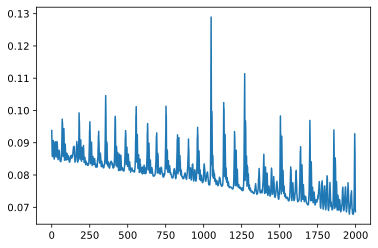

In [233]:
import pandas as pd
pd.Series(losses).plot()

In [238]:
predictions = net(Missing_Values).detach().numpy().squeeze()

In [239]:
Original_Values

754     1.7
643     2.3
772     2.3
13      1.6
1495    1.9
1059    4.0
51      2.2
1108    3.3
63      2.0
880     1.6
Name: residual sugar, dtype: float64

In [240]:
predictions

array([1.627565 , 2.3112383, 2.4932835, 1.8172024, 2.0640018, 4.214097 ,
       2.12109  , 3.5898309, 2.16991  , 1.5848409], dtype=float32)

In [241]:
from sklearn.metrics import r2_score

In [242]:
r2_score(predictions,Original_Values)

0.9570666880109098